## Table of Contents

- [데이터 탐색](#Ch1)

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv
/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


## 데이터 탐색 <a class='anchor' id='ch1'></a>

- asdfasdf

In [33]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

In [34]:
train_data.shape, test_data.shape, sample_submission.shape

((165034, 14), (110023, 13), (110023, 2))

In [35]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import shap

import warnings
warnings.filterwarnings("ignore")

In [36]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')

In [37]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

origional_data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [5]:
import scipy.stats as stats
import pandas as pd

train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

Group1 = train_data[train_data['Exited'] == 0]
Group2 = train_data[train_data['Exited'] == 1]


print("그룹 1:")
print(Group1.describe())
print("\n그룹 2:")
print(Group2.describe())


t_stat, p_value = stats.ttest_ind(Group1, Group2, equal_var=False)


print(f"t-통계량: {t_stat}")
print(f"P-value: {p_value}")


if p_value < 0.05:
    print("평균이 유의미하게 다릅니다.")
else:
    print("평균이 유의미하게 다르지 않습니다.")


그룹 1:
                  id    CustomerId    CreditScore            Age  \
count  130113.000000  1.301130e+05  130113.000000  130113.000000   
mean    82454.495416  1.569237e+07     657.590710      36.560480   
std     47668.960691  7.126773e+04      79.785902       8.147944   
min         0.000000  1.556570e+07     350.000000      18.000000   
25%     41168.000000  1.563385e+07     599.000000      31.000000   
50%     82519.000000  1.569067e+07     662.000000      36.000000   
75%    123697.000000  1.575688e+07     711.000000      40.000000   
max    165032.000000  1.581569e+07     850.000000      92.000000   

              Tenure        Balance  NumOfProducts      HasCrCard  \
count  130113.000000  130113.000000  130113.000000  130113.000000   
mean        5.048796   51255.807752       1.615273       0.758894   
std         2.799985   62189.978970       0.494632       0.427756   
min         0.000000       0.000000       1.000000       0.000000   
25%         3.000000       0.000000 

TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Axes: >

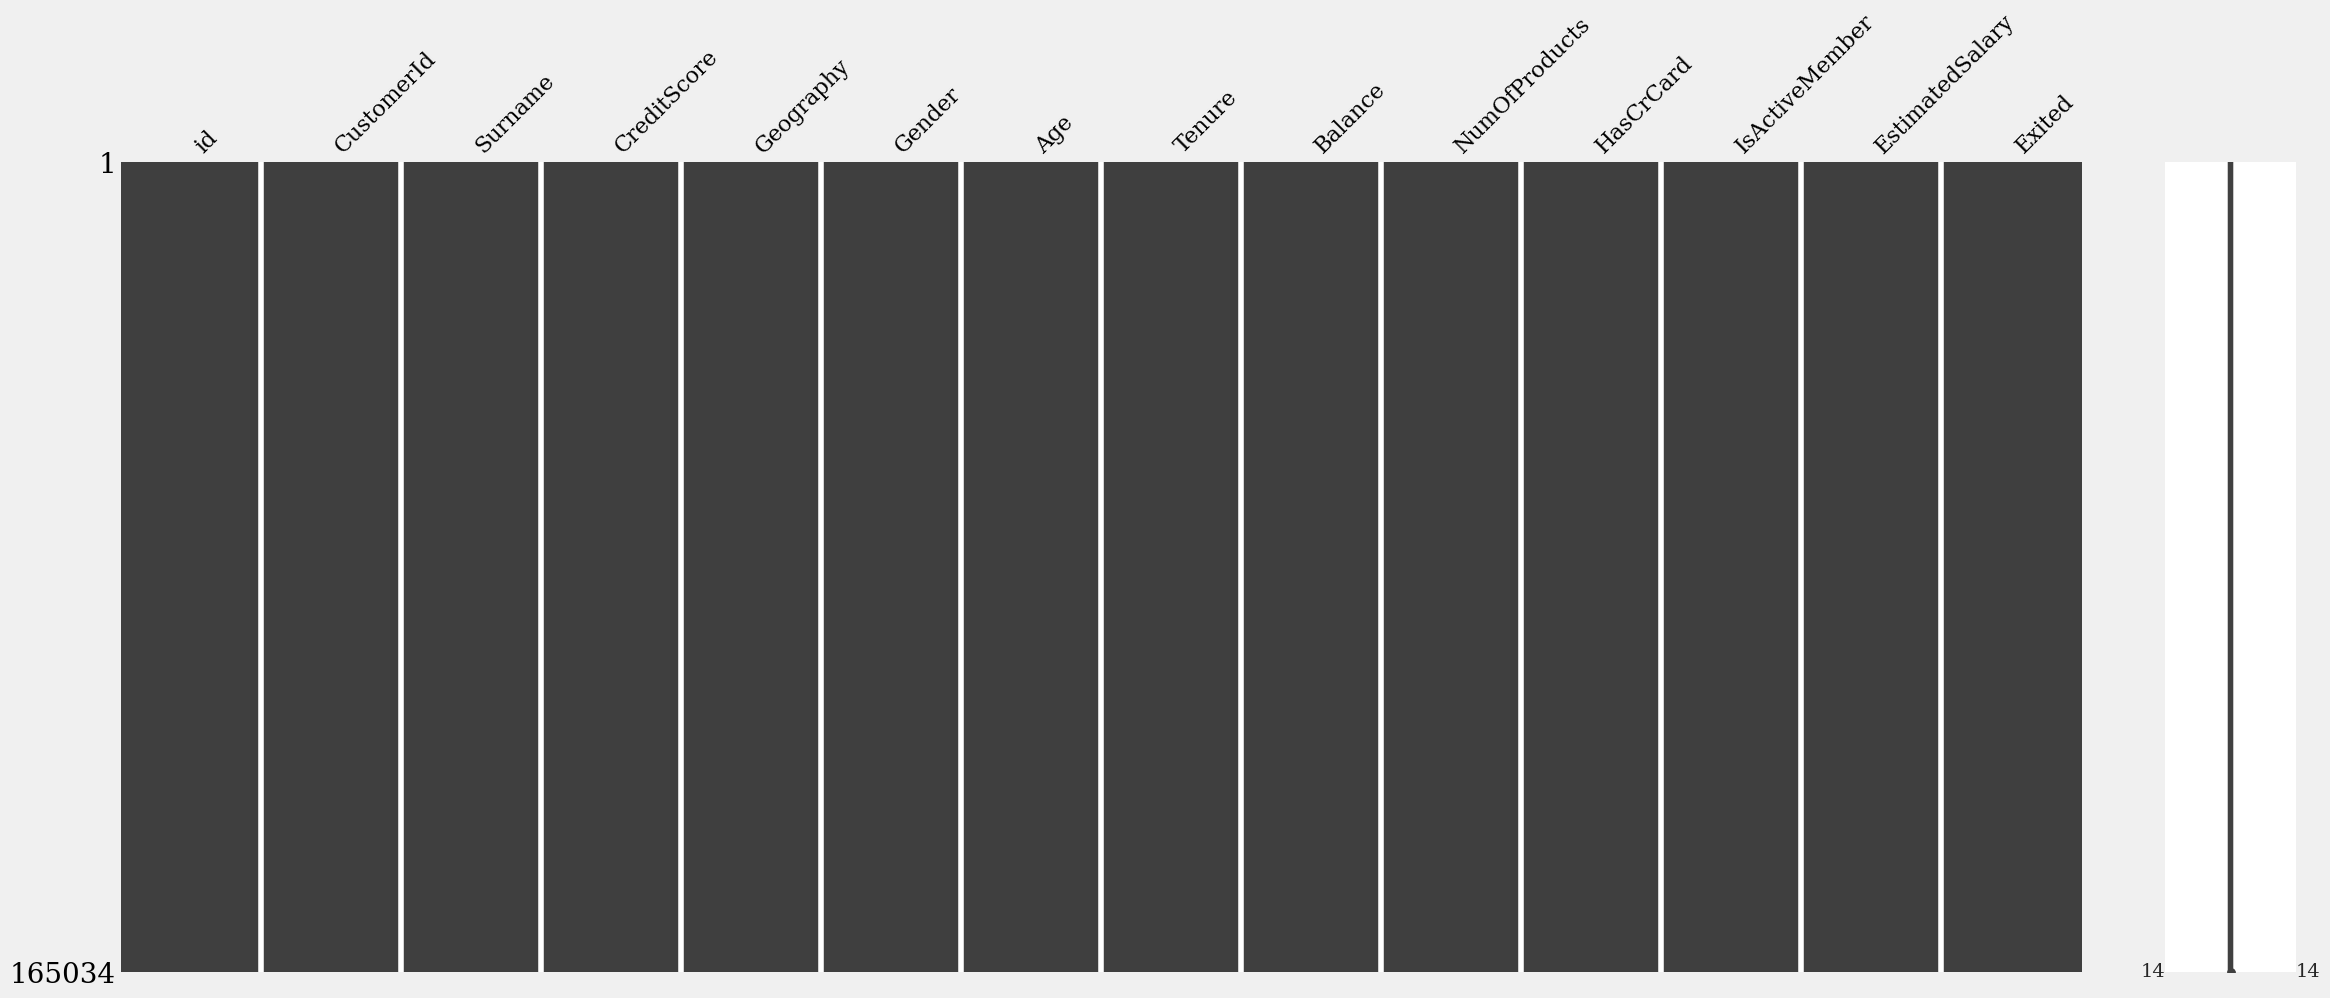

In [50]:
import missingno as msno
msno.matrix(train_data)
#train_data.info()


In [22]:
train_data.head(10)

import scipy.stats as stats
import pandas as pd


Group1 = train_data[train_data['Exited'] == 0]
Group2 = train_data[train_data['Exited'] == 1]


print("그룹 1:")
print(Group1.describe())
print("\n그룹 2:")
print(Group2.describe())


t_stat, p_value = stats.ttest_ind(Group1, Group2, equal_var=False)


print(f"t-통계량: {t_stat}")
print(f"P-value: {p_value}")


if p_value < 0.05:
    print("평균이 유의미하게 다릅니다.")
else:
    print("평균이 유의미하게 다르지 않습니다.")


그룹 1:
                  id    CustomerId    CreditScore            Age  \
count  130113.000000  1.301130e+05  130113.000000  130113.000000   
mean    82454.495416  1.569237e+07     657.590710      36.560480   
std     47668.960691  7.126773e+04      79.785902       8.147944   
min         0.000000  1.556570e+07     350.000000      18.000000   
25%     41168.000000  1.563385e+07     599.000000      31.000000   
50%     82519.000000  1.569067e+07     662.000000      36.000000   
75%    123697.000000  1.575688e+07     711.000000      40.000000   
max    165032.000000  1.581569e+07     850.000000      92.000000   

              Tenure        Balance  NumOfProducts      HasCrCard  \
count  130113.000000  130113.000000  130113.000000  130113.000000   
mean        5.048796   51255.807752       1.615273       0.758894   
std         2.799985   62189.978970       0.494632       0.427756   
min         0.000000       0.000000       1.000000       0.000000   
25%         3.000000       0.000000 

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [39]:
train_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,165034.000000,82516.500000,47641.356500,0.000000,41258.250000,82516.500000,123774.750000,165033.000000
CustomerId,165034.000000,15692005.019026,71397.816791,15565701.000000,15633141.000000,15690169.000000,15756824.000000,15815690.000000
CreditScore,165034.000000,656.454373,80.103340,350.000000,597.000000,659.000000,710.000000,850.000000
Age,165034.000000,38.125888,8.867205,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,165034.000000,5.020353,2.806159,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,165034.000000,55478.086689,62817.663278,0.000000,0.000000,0.000000,119939.517500,250898.090000
NumOfProducts,165034.000000,1.554455,0.547154,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,165034.000000,0.753954,0.430707,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,165034.000000,0.497770,0.499997,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,165034.000000,112574.822734,50292.865585,11.580000,74637.570000,117948.000000,155152.467500,199992.480000


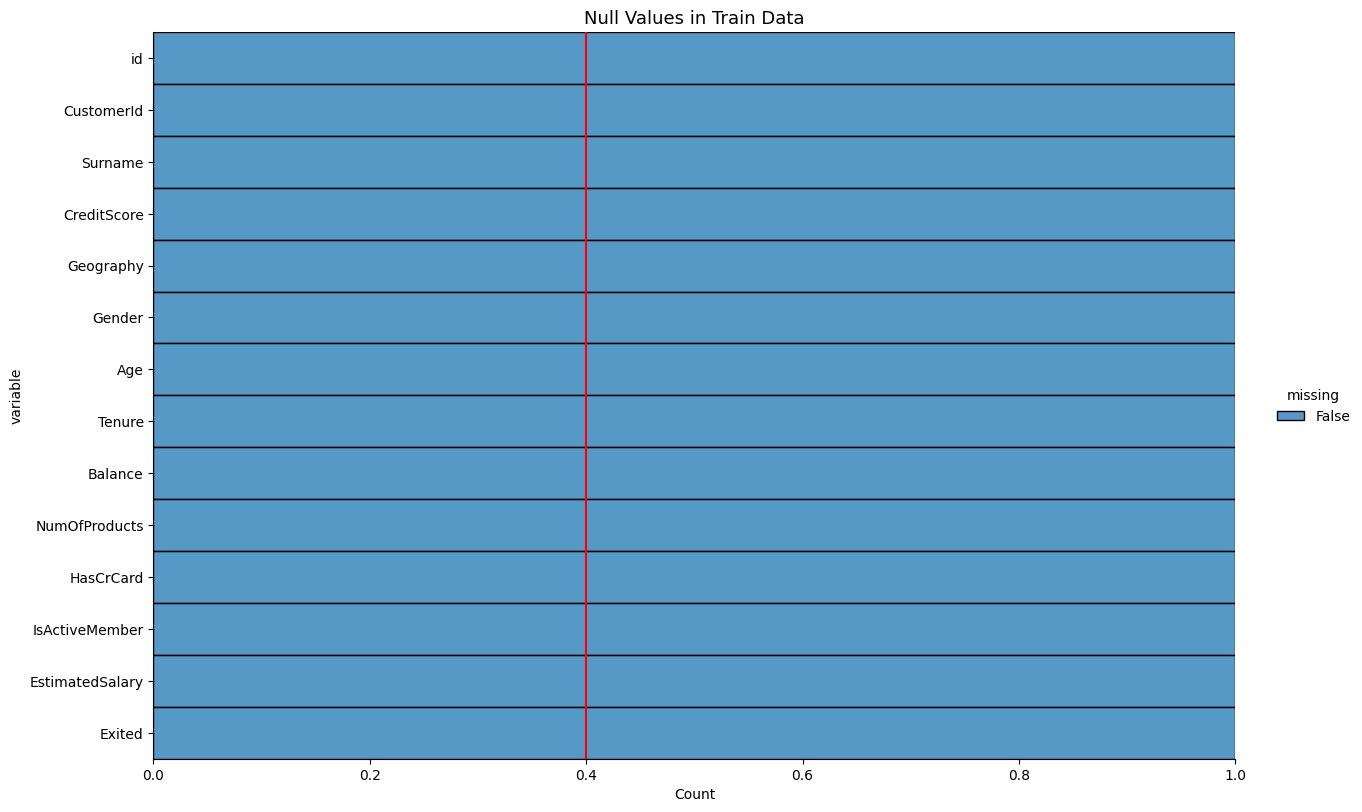

NameError: name 'test_data' is not defined

In [23]:
sns.displot(data=train_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
plt.axvline(0.4, color='r')
plt.title('Null Values in Train Data', fontsize=13)
plt.show()



sns.displot(data=test_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)


plt.axvline(0.4, color='r')
plt.title('Null Values in Test Data', fontsize=13)
plt.show()

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns






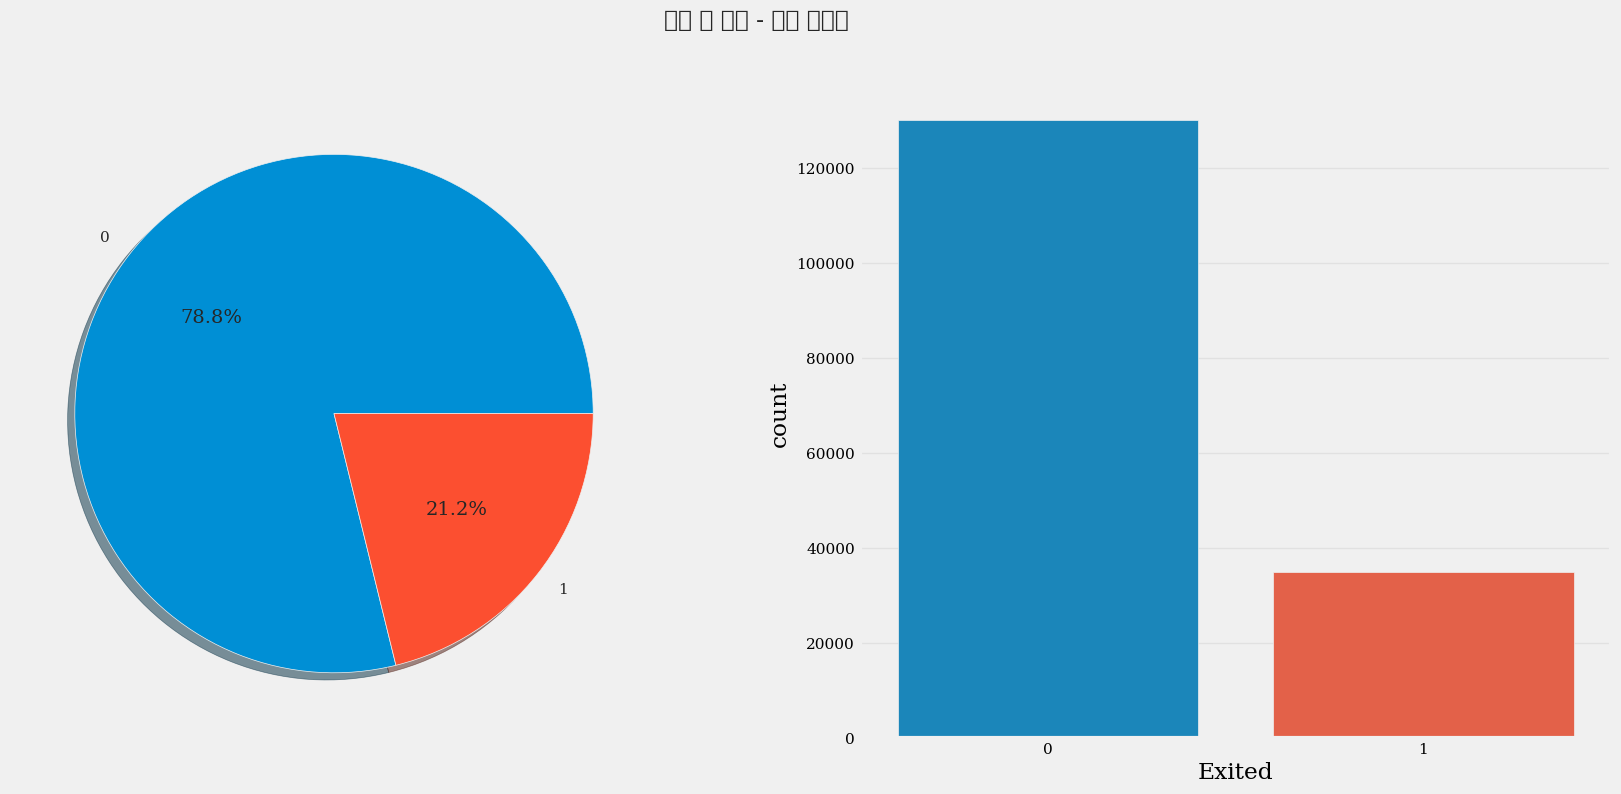

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그림을 나누기
fig, ax = plt.subplots(1, 2, figsize=(19, 8))

# 타겟 값에 대한 파이 차트 그리기
train_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)

# 첫 번째 서브플롯의 y축 레이블 없애기
ax[0].set_ylabel('')

# 타겟 값에 대한 카운트 플롯 그리기
sns.countplot(x='Exited', data=train_data, ax=ax[1])

# 전체 그림의 제목 설정
plt.suptitle('타겟 값 분석 - 경쟁 데이터')

# 그림 표시
plt.show()


In [43]:
unique_counts = train_data.nunique()

threshold = 12

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

if'outcome' in categorical_vars:
    categorical_vars.remove('outcome')
if 'id' in continuous_vars:
    continuous_vars.remove('id')

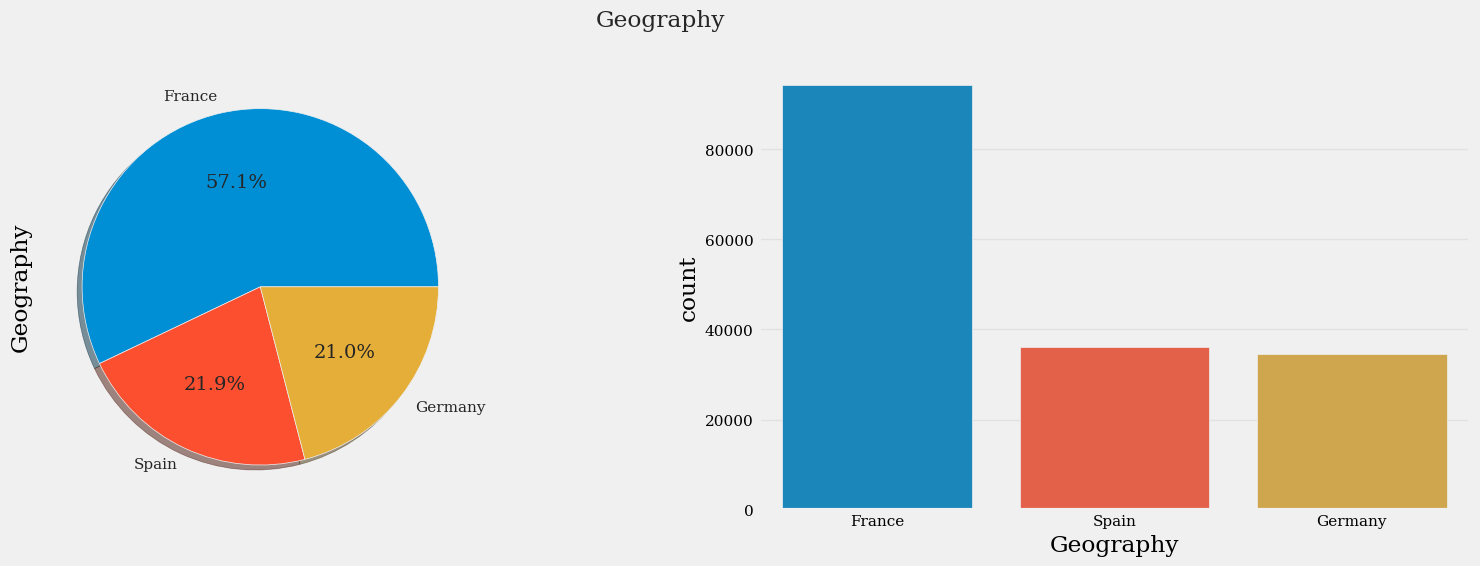

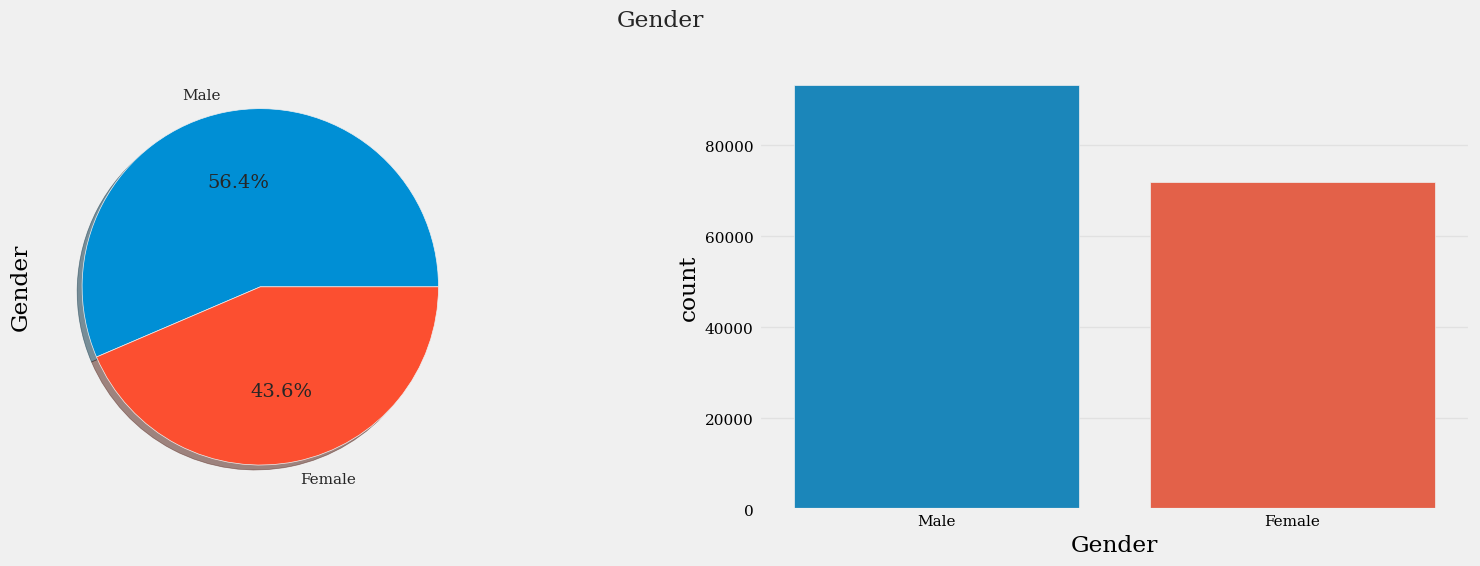

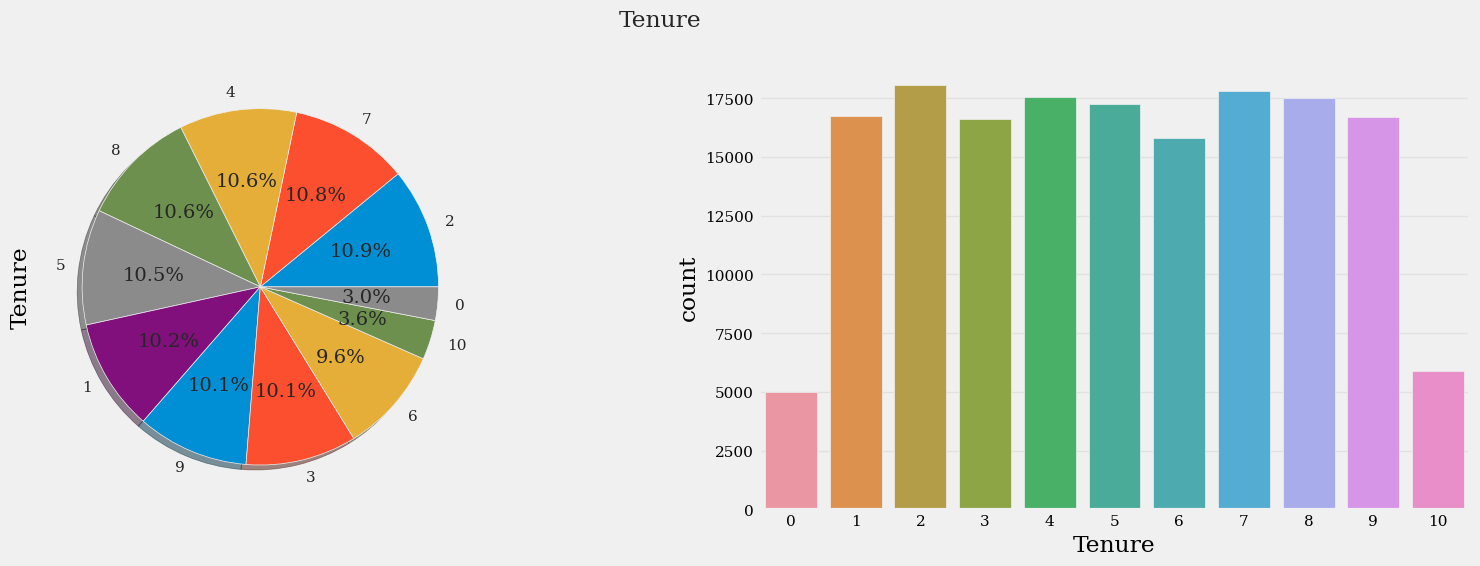

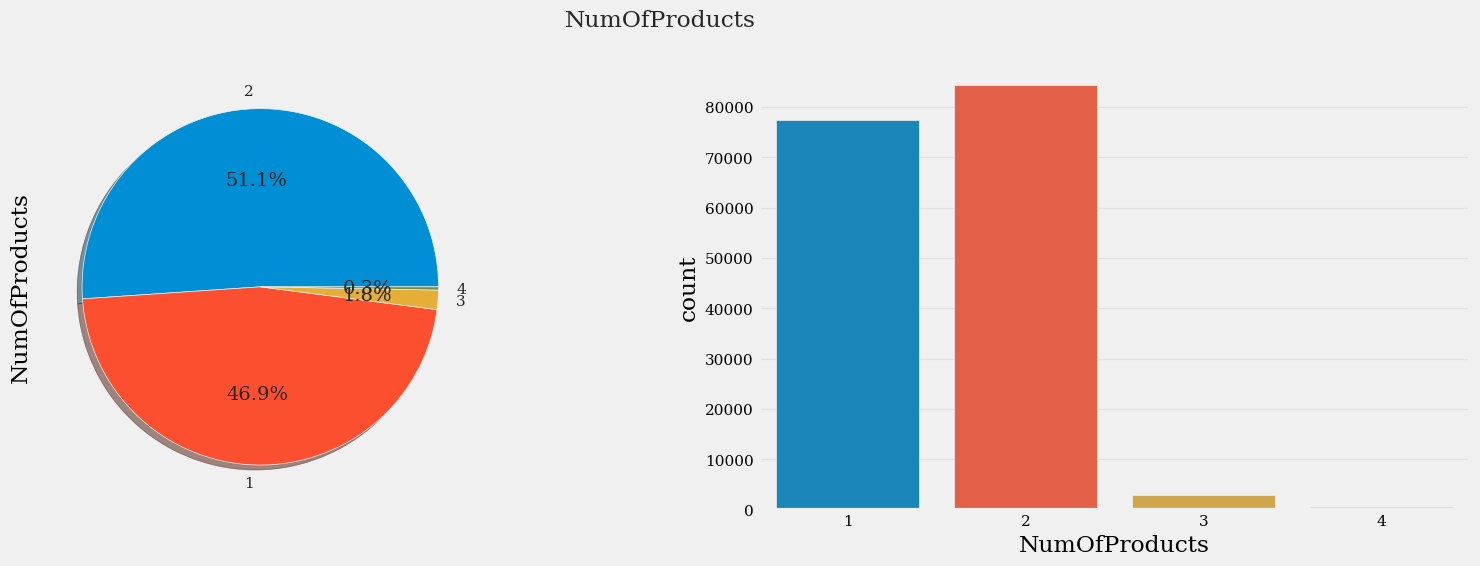

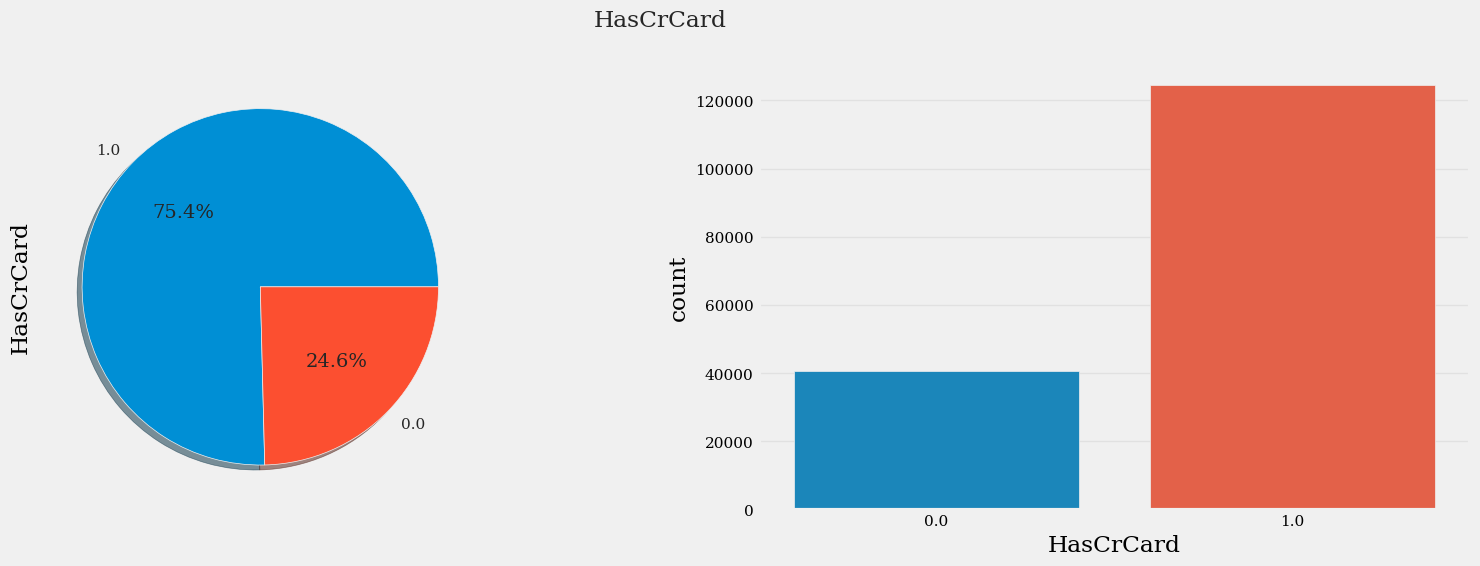

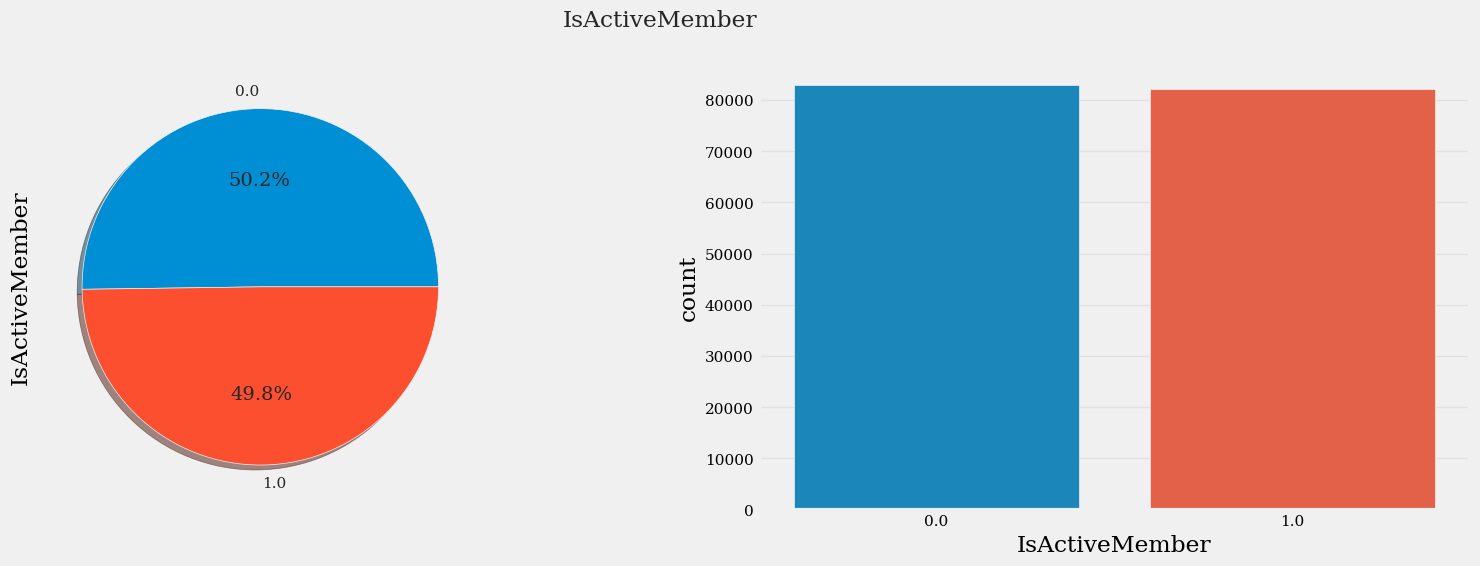

In [44]:
categorical_vars.remove('Exited')

for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    train_data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=train_data,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

In [20]:
continuous_vars.remove('CustomerId')
continuous_vars.remove('Surname')

for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=train_data, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

NameError: name 'continuous_vars' is not defined

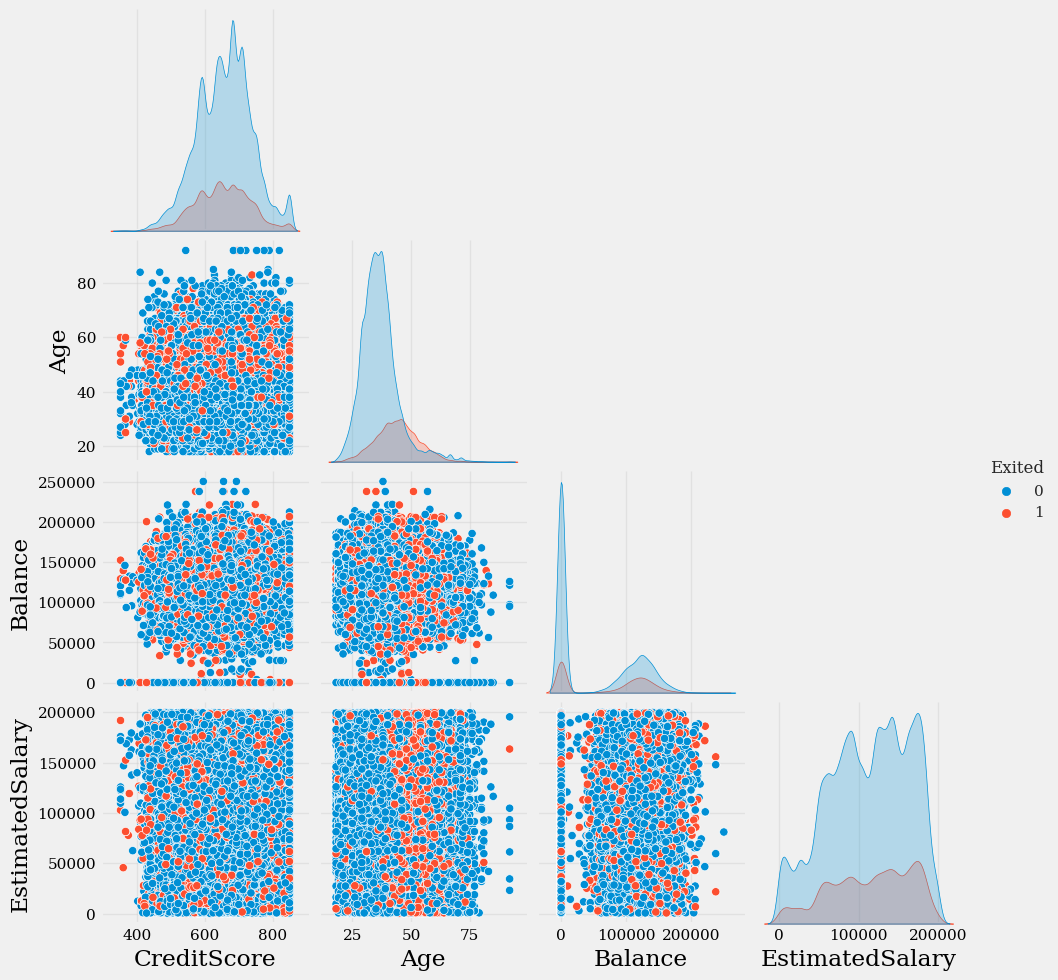

In [46]:
df3 = train_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].copy()
sns.pairplot(df3, hue="Exited", corner=True)
plt.show()

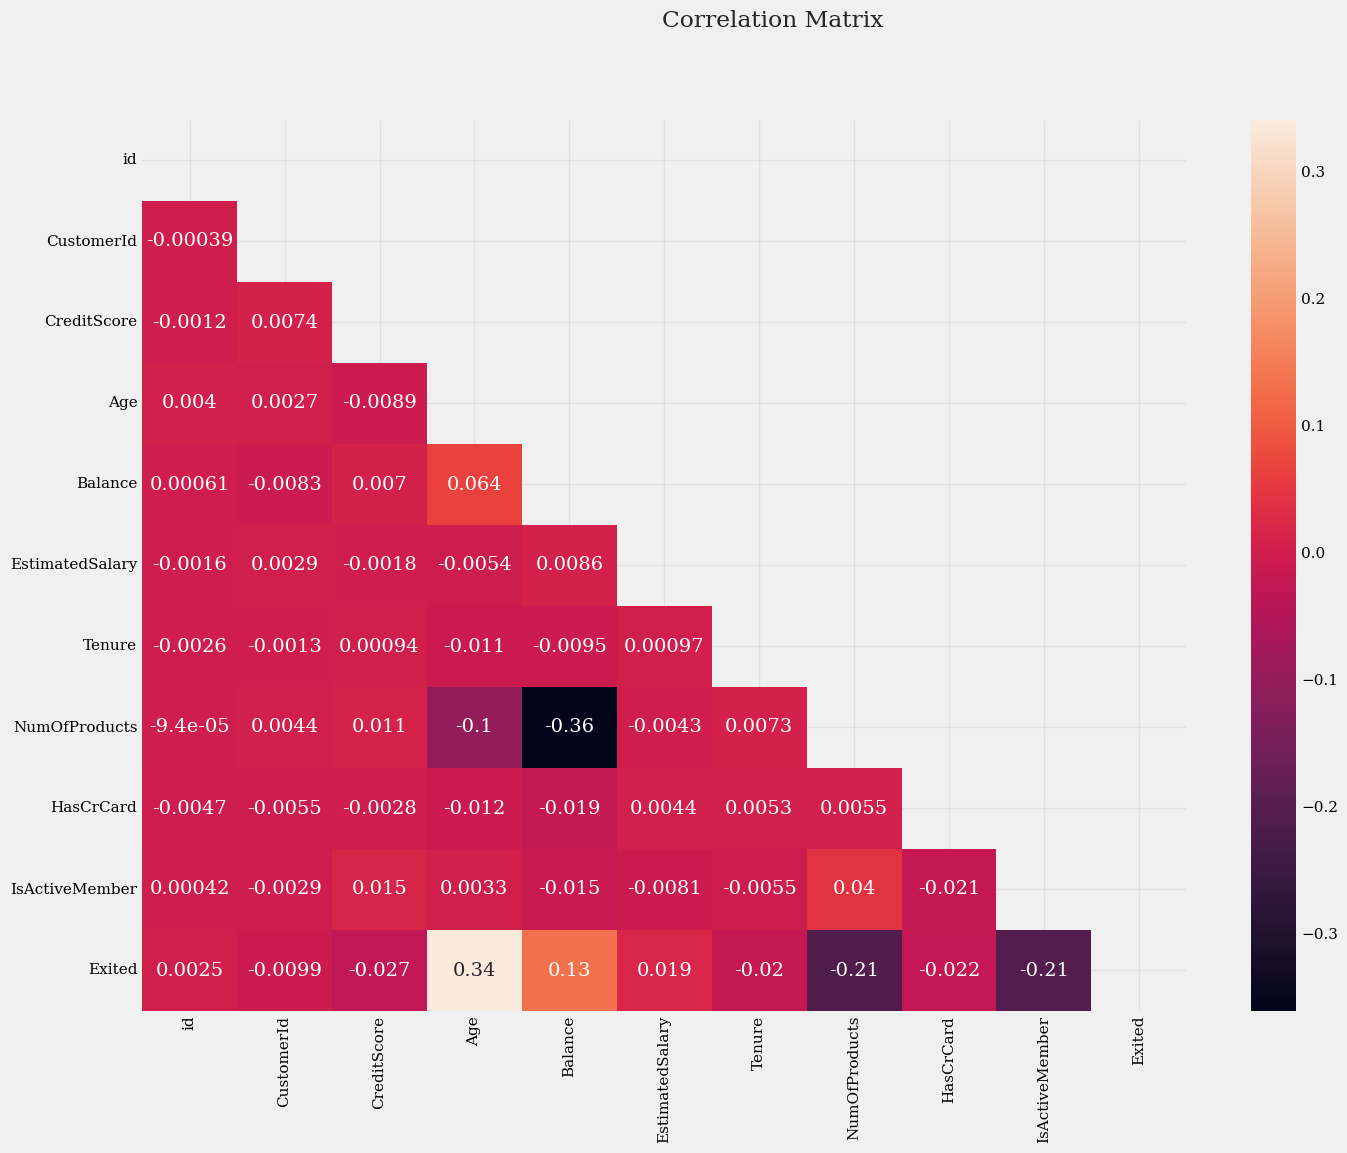

In [47]:
df4 = train_data[['id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPyt

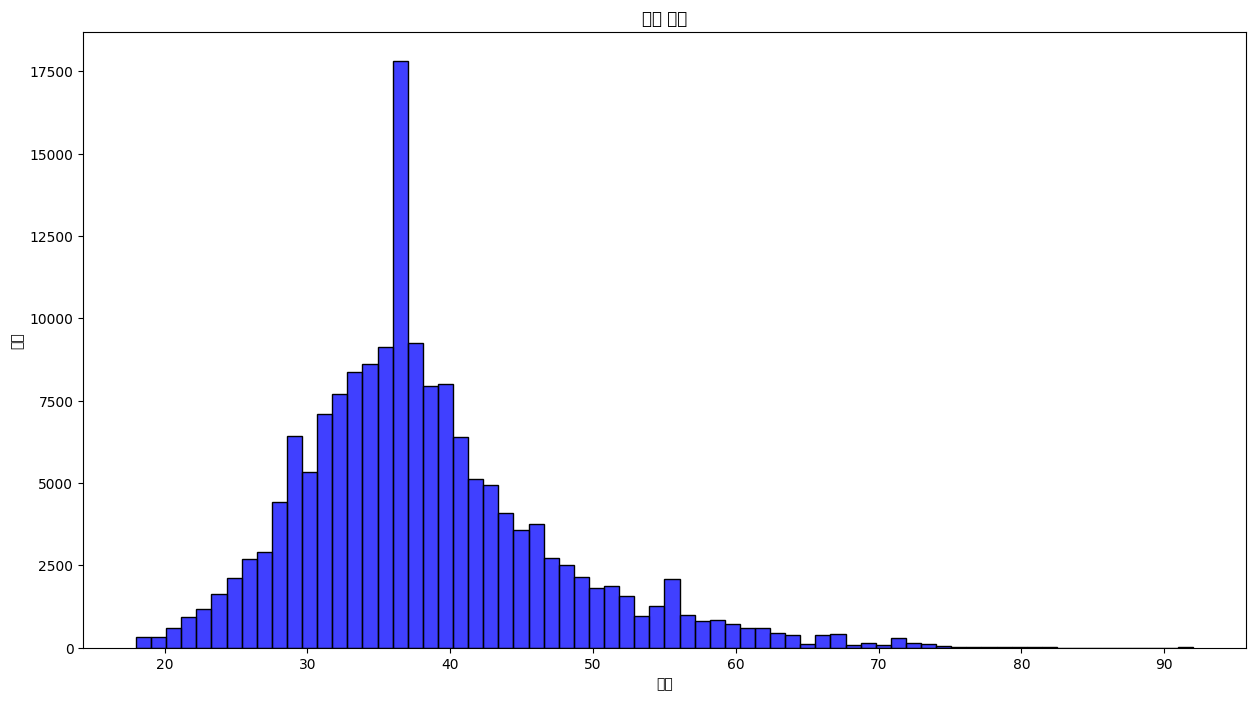

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/I

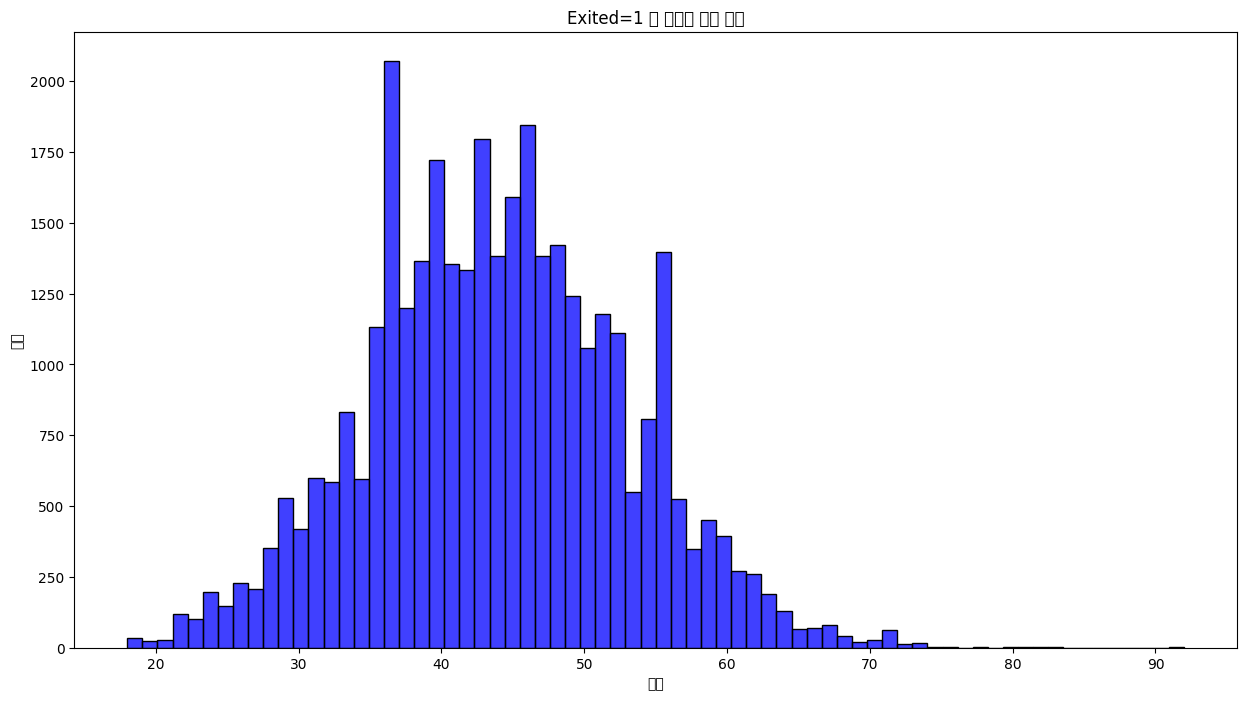

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


exited_data = train_data[train_data['Exited'] == 1]


plt.figure(figsize=(15, 8))
sns.histplot(exited_data['Age'], bins=70, color='blue')
plt.title('Exited=1 인 경우의 나이 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.show()


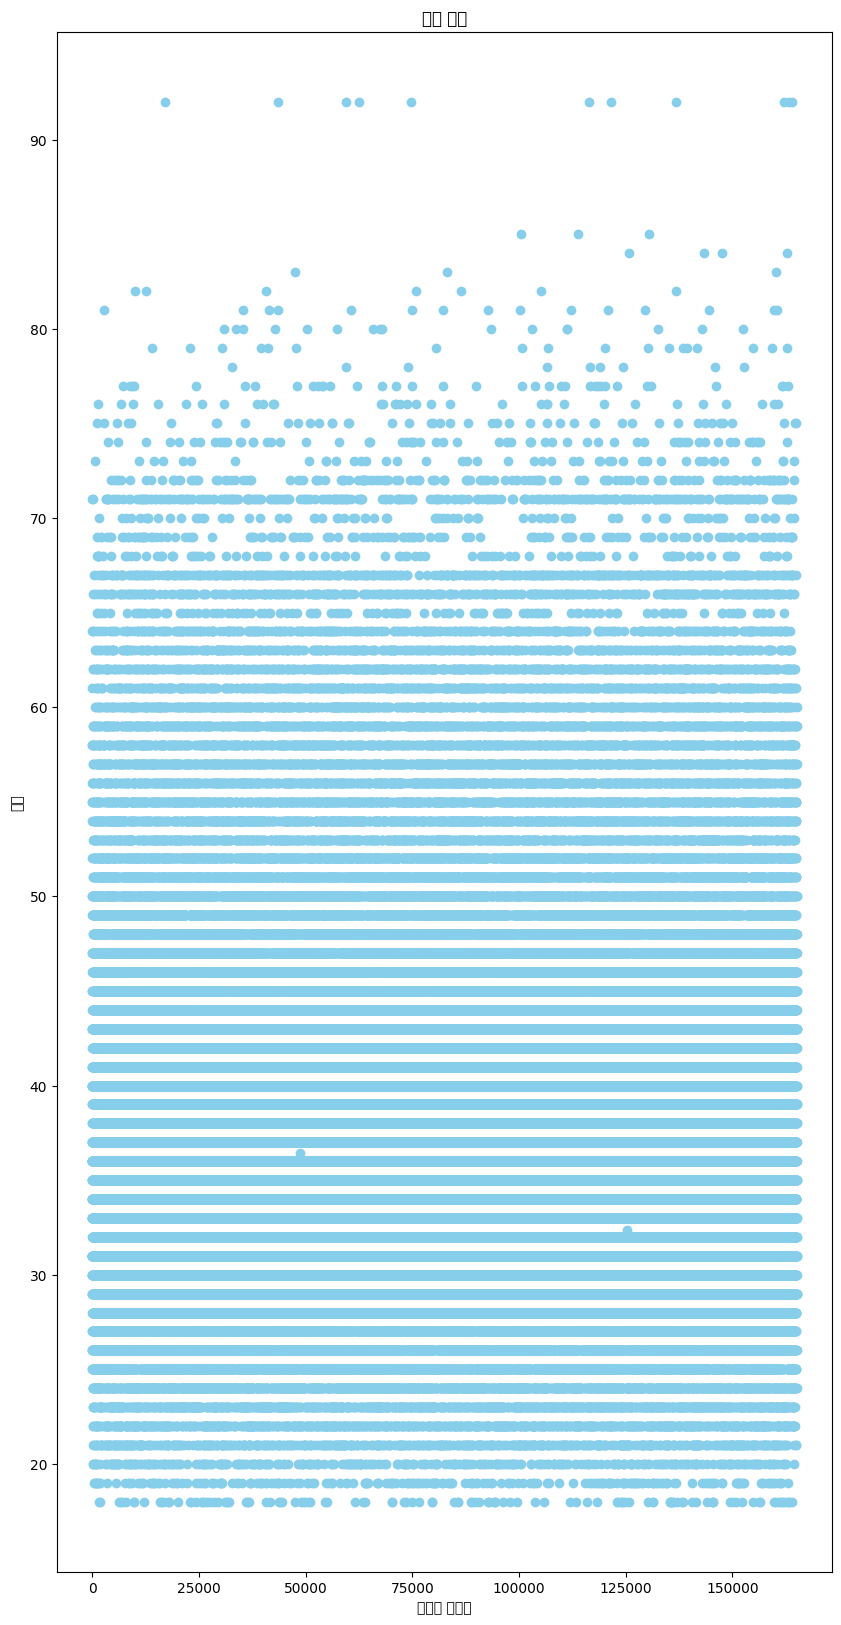

In [16]:
plt.figure(figsize=(10, 20))
plt.scatter(train_data.index, train_data['Age'], color='skyblue', marker='o')
plt.title('나이 분포')
plt.xlabel('데이터 인덱스')
plt.ylabel('나이')
plt.show()


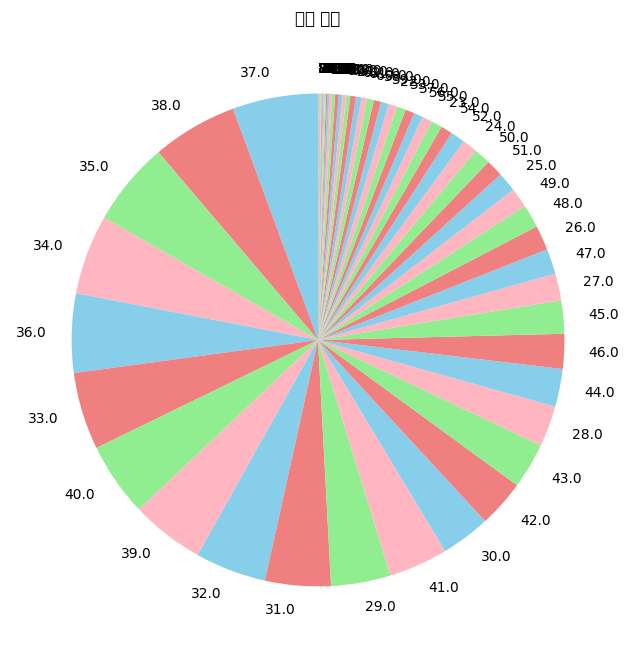

In [41]:
age_counts = train_data['Age'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.title('나이 분포')
plt.show()


In [48]:
import pandas as pd


train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')


mean_num_of_products = train_data['NumOfProducts'].mean()

print(f"NumOfProducts 열의 평균: {mean_num_of_products}")


NumOfProducts 열의 평균: 1.5544554455445545


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


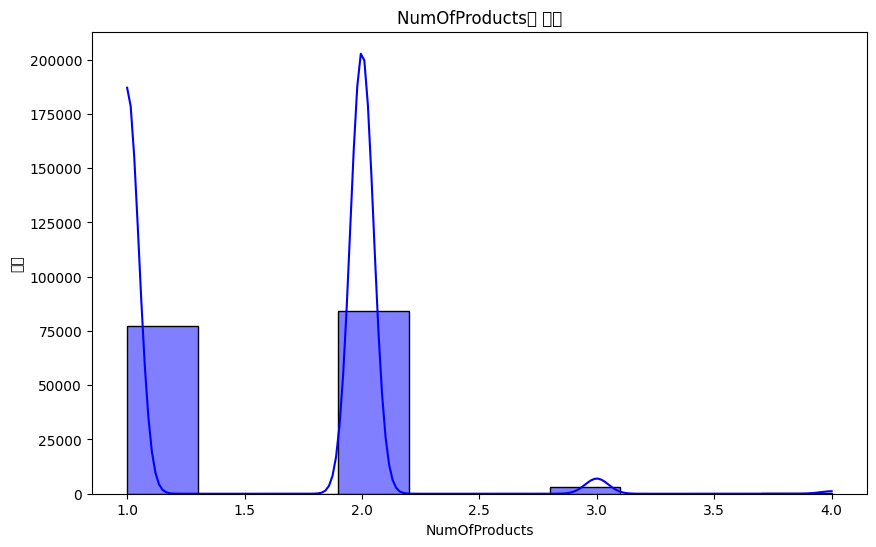

In [49]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')


plt.figure(figsize=(10, 6))
sns.histplot(train_data['NumOfProducts'], bins=10, kde=True, color='blue')
plt.title('NumOfProducts의 분포')
plt.xlabel('NumOfProducts')
plt.ylabel('빈도')
plt.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


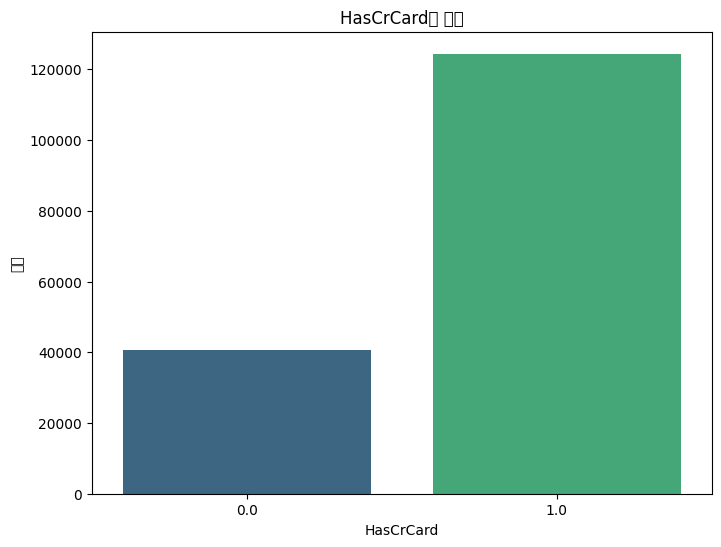

In [51]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')


plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', data=train_data, palette='viridis')
plt.title('HasCrCard의 분포')
plt.xlabel('HasCrCard')
plt.ylabel('빈도')
plt.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


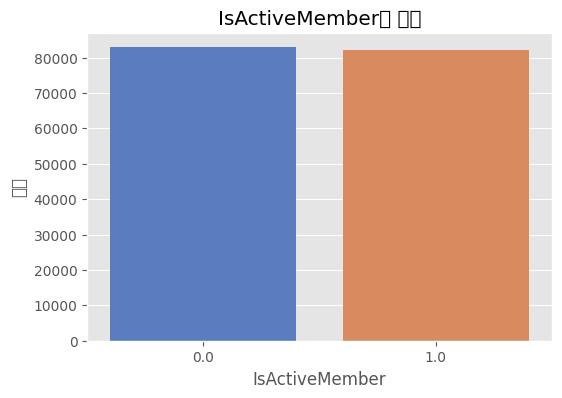

In [70]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')


plt.figure(figsize=(6, 4))
sns.countplot(x='IsActiveMember', data=train_data, palette='muted')
plt.title('IsActiveMember의 분포')
plt.xlabel('IsActiveMember')
plt.ylabel('빈도')
plt.show()


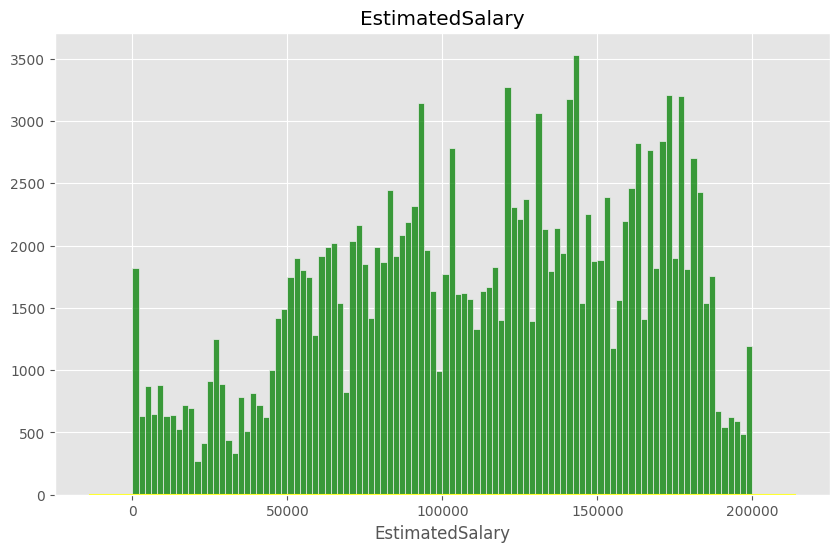

In [83]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

plt.figure(figsize=(10, 6))
sns.histplot(train_data['EstimatedSalary'], bins=100, color='green', kde=False)
sns.kdeplot(train_data['EstimatedSalary'], color='yellow')
plt.title('EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('')
plt.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


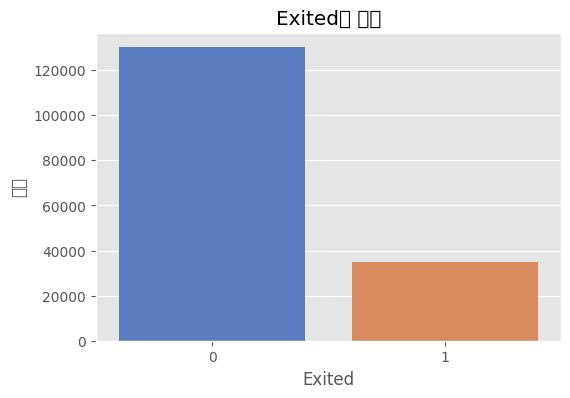

In [68]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')


exit_counts = train_data['Exited'].value_counts()


plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=train_data, palette='muted')
plt.title('Exited의 분포')
plt.xlabel('Exited')
plt.ylabel('빈도')
plt.show()


In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(data['EstimatedSalary'], bins=30, kde=True)
plt.title('예상 연봉 분포')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

In [73]:
from scipy.stats import shapiro


data = train_data['EstimatedSalary']


statistic, p_value = shapiro(data)


print(f"통계량 (W): {statistic}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value > alpha:
    print("귀무가설을 기각안함")
else:
    print("귀무가설을 기각함")


통계량 (W): 0.967251718044281
P-value: 0.0
귀무가설을 기각함


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


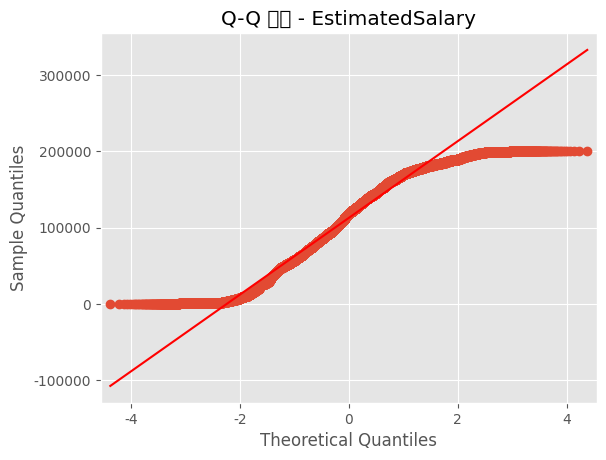

In [74]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = train_data['EstimatedSalary']

sm.qqplot(data, line='s')
plt.title('Q-Q 플롯 - EstimatedSalary')
plt.show()


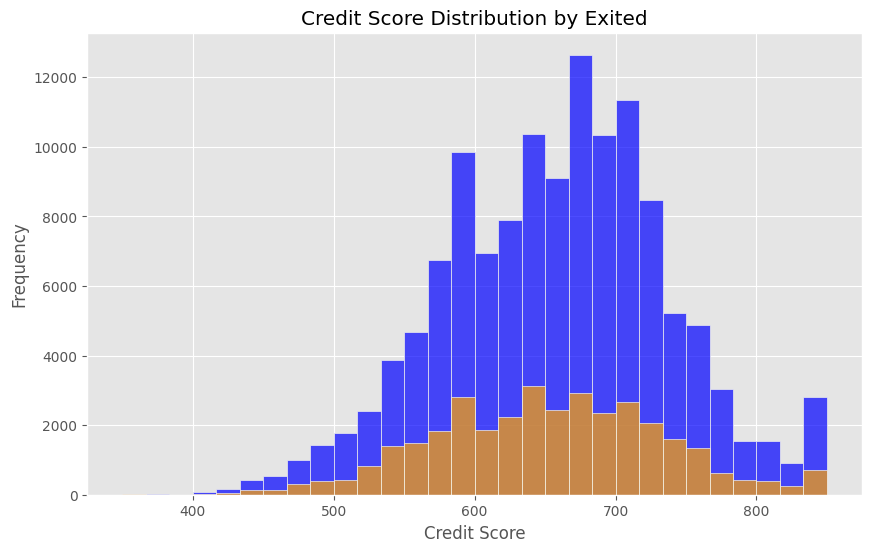

In [88]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

exited_0 = train_data[train_data['Exited'] == 0]
exited_1 = train_data[train_data['Exited'] == 1]


plt.figure(figsize=(10, 6))
sns.histplot(exited_0['CreditScore'], bins=30, color='blue', label='Exited 0', alpha=0.7)
sns.histplot(exited_1['CreditScore'], bins=30, color='orange', label='Exited 1', alpha=0.7)
plt.title('Credit Score Distribution by Exited')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


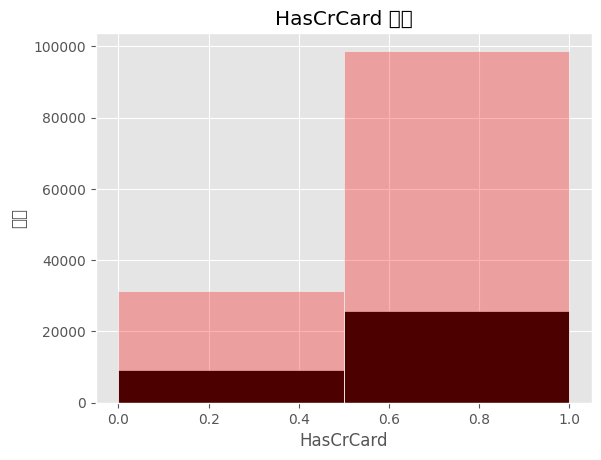

In [94]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')


exited_1 = train_data[train_data['Exited'] == 1]
sns.histplot(exited_1['HasCrCard'], bins=2, color='black', label='Exited 1', alpha=2)


exited_0 = train_data[train_data['Exited'] == 0]
sns.histplot(exited_0['HasCrCard'], bins=2, color='red', label='Exited 0', alpha=0.3)


plt.title('HasCrCard 분포')
plt.xlabel('HasCrCard')
plt.ylabel('빈도')


plt.show()
